In [1]:
import geopandas as gpd
import osmnx as ox
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import aup
%matplotlib inline

In [20]:
city = 'Guadalajara'

In [75]:
gdf_pop = gpd.read_file('../data/raw/AGEB_urb_2010_SCINCE.geojson')

gdf_area = aup.load_polygon(city)
gdf_pop_area = gpd.clip(gdf_pop,gdf_area)

G = aup.download_graph(gdf_area,city,network_type='all_private',save=False)
nodes = ox.graph_to_gdfs(G, edges=False)
gdf_pop_area = ox.utils_geo.projection.project_gdf(gdf_pop_area,to_crs=nodes.crs)

Guadalajara retrived graph


In [76]:
totales = gpd.sjoin(nodes,gdf_pop_area).groupby('CVEGEO').count().rename(columns={'x':'nodes_in'})[['nodes_in']].reset_index() #caluculate the totals
temp = pd.merge(gdf_pop_area,totales,left_on='CVEGEO',right_on='CVEGEO') #get a temporal dataframe with the totals and columns
for col in temp.columns.tolist()[3:-2]: #get the average for the values
    temp[col] = temp[col]/temp['nodes_in']
temp.drop(['nodes_in'],axis=1,inplace=True) #drop the nodes_in column
nodes = gpd.sjoin(nodes,temp) #spatial join the nodes with the values

In [77]:
hex_bins = gpd.read_file(f'../data/processed/{city}_hex_bins.geojson')
hex_temp = hex_bins[[f'hex_id_{res}','geometry']]

In [78]:
nodes.drop('index_right',axis=1,inplace=True)

In [79]:
res = 9
hex_temp = ox.utils_geo.projection.project_gdf(hex_temp, to_crs=nodes.crs)
hex_temp = gpd.sjoin(nodes,hex_temp)
hex_temp = hex_temp.groupby(f'hex_id_{res}').sum()

In [80]:
columns = gdf_pop.columns.tolist()[3:-1]

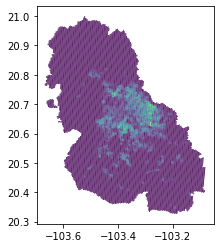

In [89]:
hex_temp = hex_temp[columns]
hex_bins = pd.merge(hex_bins,hex_temp,right_index=True,left_on=f'hex_id_{res}',how = 'left').fillna(0)
hex_bins.plot(column='pobtot')

In [88]:
hex_bins_new

,hex_id_9,dist_supermercados,dist_hospitales,dist_farmacias,geometry,pobtot,pobmas,pobfem,p_0a2,p_0a2_m,...,vph_snbien,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter
0,8949aa258bbffff,0.000,0.000,0.000,"POLYGON ((-103.46609 20.50531, -103.46697 20.5...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8949aa29cabffff,7558.472,9332.272,7379.624,"POLYGON ((-103.16301 20.46139, -103.16423 20.4...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8949aa2e397ffff,4551.951,10055.251,5104.564,"POLYGON ((-103.35787 20.47755, -103.35875 20.4...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8949ab4c51bffff,0.000,0.000,0.000,"POLYGON ((-103.62100 20.86823, -103.62188 20.8...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,89498c922c7ffff,0.000,0.000,0.000,"POLYGON ((-103.16470 20.53875, -103.16557 20.5...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21549,89498c90dcfffff,1895.493,2495.084,1572.729,"POLYGON ((-103.22233 20.62766, -103.22023 20.6...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21550,8949ab413a3ffff,3355.508,9996.717,4404.424,"POLYGON ((-103.55787 20.74458, -103.55997 20.7...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21551,8949ab4d277ffff,0.000,0.000,0.000,"POLYGON ((-103.51056 20.90218, -103.50934 20.9...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21552,8949aa20e53ffff,0.000,0.000,0.000,"POLYGON ((-103.35202 20.38784, -103.35080 20.3...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
len(hex_temp), len(hex_bins), len(hex_bins_new)

(5433, 21554, 21554)

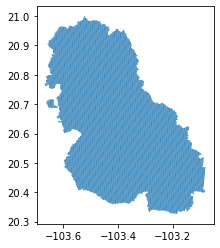

In [66]:
hex_bins.plot()

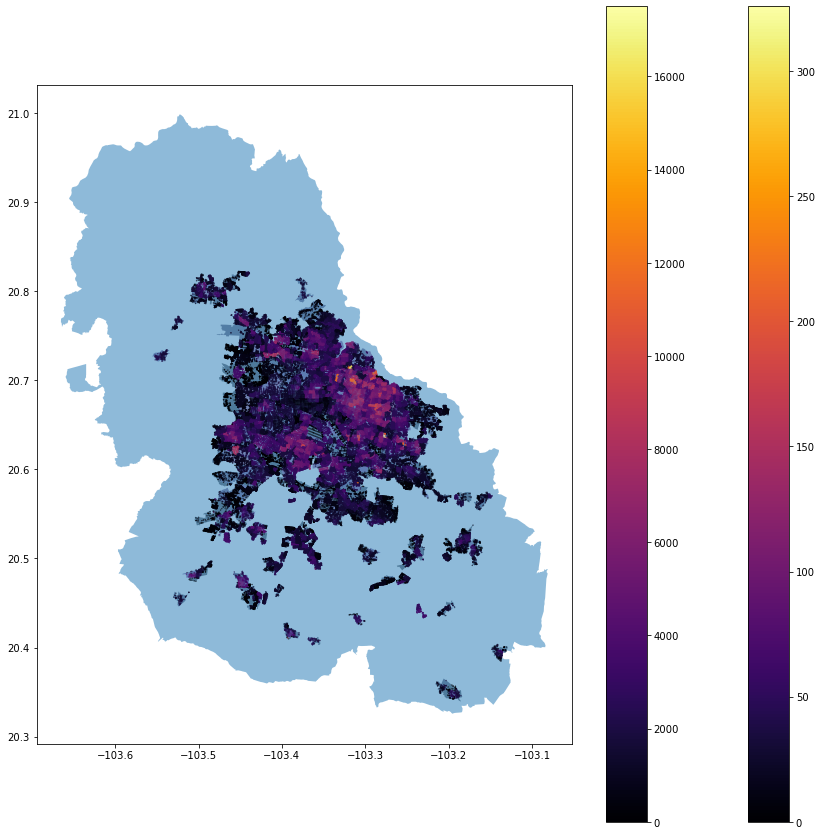

In [143]:
ax = nodes.plot(column='pobtot',markersize=0.1,figsize=(15,15),legend=True,cmap='inferno',zorder=3)
gdf_pop_area.plot(column='pobtot',markersize=0.1,figsize=(15,15),legend=True,cmap='inferno',zorder=-1,alpha=0.5,ax=ax)
gdf_area.plot(markersize=0.1,figsize=(15,15),legend=False,zorder=-1,alpha=0.5,ax=ax)

In [ ]:
gdf_pop_area